##The Employee Attrition project is a comprehensive exploration into the factors contributing to employee turnover within an organization. Leveraging a combination of classification and regression machine learning techniques, this project delves into the intricate relationships between various factors and the likelihood of employee attrition. By analyzing features such as job roles, satisfaction levels, tenure, and performance metrics, the project uncovers patterns that lead to informed insights about attrition trends. Whether it's predicting potential departures or understanding the driving forces behind attrition, this project equips businesses with data-driven tools to retain and optimize their workforce.

Importing Libraries

In [249]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings("ignore")



In [250]:

df= pd.read_csv("C:/Users/ANMOL ASHA/Downloads/Employee_Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [252]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [253]:
df.shape

(1470, 35)

In [254]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

To convert categorical columns into numeric value now we are Applying LABEL ENCODER

In [255]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
le

LabelEncoder()

In [256]:
le_BT=LabelEncoder()
le_DT=LabelEncoder()
le_EF=LabelEncoder()
le_GN=LabelEncoder()
le_JR=LabelEncoder()
le_MS=LabelEncoder()
le_OT=LabelEncoder()
le_AR=LabelEncoder()



In [257]:
df["BusinessTravel"]=le_BT.fit_transform(df["BusinessTravel"])
df["Department"]=le_DT.fit_transform(df["Department"])
df["EducationField"]=le_EF.fit_transform(df["EducationField"])
df["Gender"]=le_GN.fit_transform(df["Gender"])
df["JobRole"]=le_JR.fit_transform(df["JobRole"])
df["OverTime"]=le_OT.fit_transform(df["OverTime"])
df["MaritalStatus"]=le_MS.fit_transform(df["MaritalStatus"])
df["Attrition"]=le_AR.fit_transform(df['Attrition'])
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [258]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [259]:
x=df[["Age","BusinessTravel","PercentSalaryHike","MaritalStatus","JobSatisfaction","DistanceFromHome","Gender","MonthlyIncome"]]
x

,Age,BusinessTravel,PercentSalaryHike,MaritalStatus,JobSatisfaction,DistanceFromHome,Gender,MonthlyIncome
0,41,2,11,2,4,1,0,5993
1,49,1,23,1,2,8,1,5130
2,37,2,15,2,3,2,1,2090
3,33,1,11,1,3,3,0,2909
4,27,2,12,1,2,2,1,3468
...,...,...,...,...,...,...,...,...
1465,36,1,17,1,4,23,1,2571
1466,39,2,15,1,1,6,1,9991
1467,27,2,20,1,2,4,1,6142
1468,49,1,14,1,2,2,1,5390


In [260]:
y=df["Attrition"]
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

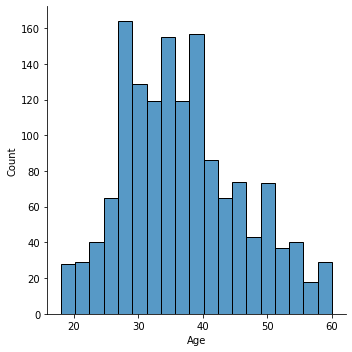

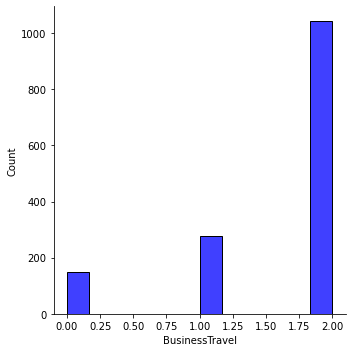

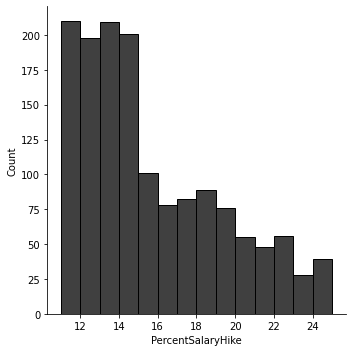

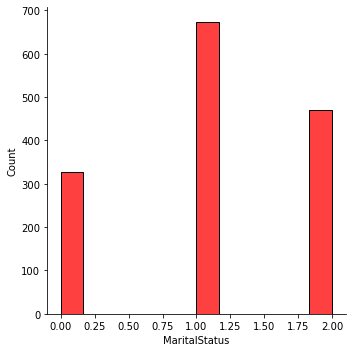

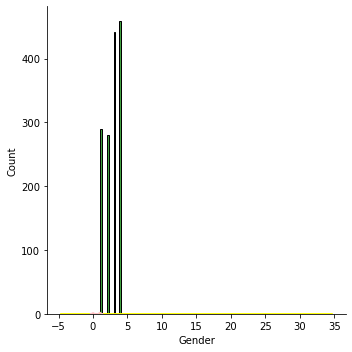

In [261]:
sns.displot(df["Age"])
sns.displot(df["BusinessTravel"], color='blue')
sns.displot(df["PercentSalaryHike"], color='black')
sns.displot(df["MaritalStatus"], color='red')
sns.displot(df["JobSatisfaction"], color='green')
sns.distplot(df["DistanceFromHome"], color='yellow')
sns.distplot(df["Gender"], color='pink')
plt.show()

In [262]:
df["Gender"].value_counts()

1    882
0    588
Name: Gender, dtype: int64

In [263]:
df["Gender"].value_counts().keys()

Int64Index([1, 0], dtype='int64')

In [264]:
df["Gender"].value_counts().values

array([882, 588], dtype=int64)

<BarContainer object of 2 artists>

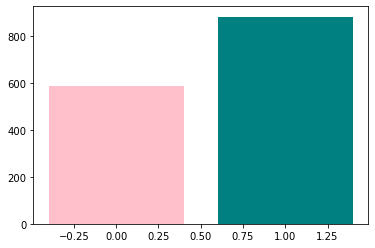

In [265]:
plt.bar(list(df['Gender'].value_counts().keys()),list(df['Gender'].value_counts()),color = ['teal','pink'])


In [266]:
df["MaritalStatus"].value_counts()

1    673
2    470
0    327
Name: MaritalStatus, dtype: int64

In [267]:
df["MaritalStatus"].value_counts().keys()

Int64Index([1, 2, 0], dtype='int64')

In [268]:
df["MaritalStatus"].value_counts().values

array([673, 470, 327], dtype=int64)

<BarContainer object of 3 artists>

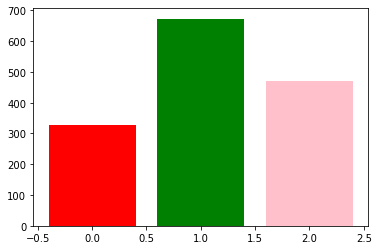

In [269]:
plt.bar(list(df['MaritalStatus'].value_counts().keys()),list(df['MaritalStatus'].value_counts()),color = ['green','pink','red'])


In [270]:
df["BusinessTravel"].value_counts()

2    1043
1     277
0     150
Name: BusinessTravel, dtype: int64

In [271]:
df["BusinessTravel"].value_counts().keys()

Int64Index([2, 1, 0], dtype='int64')

In [272]:
df["BusinessTravel"].value_counts().values

array([1043,  277,  150], dtype=int64)

<BarContainer object of 3 artists>

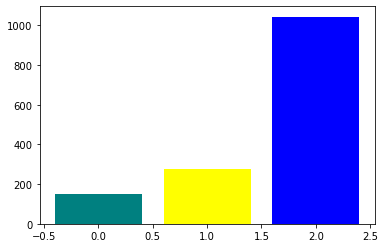

In [273]:
plt.bar(list(df['BusinessTravel'].value_counts().keys()),list(df['BusinessTravel'].value_counts()),color =['blue','yellow','teal'])


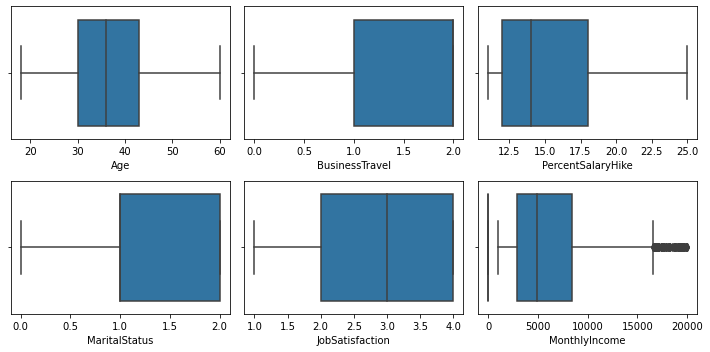

In [274]:
# Outlier Analysis
%matplotlib inline
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(x['Age'],ax = axs[0,0])
plt2 = sns.boxplot(x['BusinessTravel'],ax = axs[0,1])
plt3 = sns.boxplot(x['PercentSalaryHike'],ax = axs[0,2])
plt1 = sns.boxplot(x['MaritalStatus'],ax = axs[1,0])
plt2 = sns.boxplot(x['JobSatisfaction'],ax = axs[1,1])
plt3 = sns.boxplot(x['DistanceFromHome'],ax = axs[1,2])
plt1 = sns.boxplot(x['MonthlyIncome'],ax = axs[1,2])

plt.tight_layout()


In [275]:
x.head()

,Age,BusinessTravel,PercentSalaryHike,MaritalStatus,JobSatisfaction,DistanceFromHome,Gender,MonthlyIncome
0,41,2,11,2,4,1,0,5993
1,49,1,23,1,2,8,1,5130
2,37,2,15,2,3,2,1,2090
3,33,1,11,1,3,3,0,2909
4,27,2,12,1,2,2,1,3468


#### split data into training data and testing data

In [276]:
from sklearn.model_selection import train_test_split

In [277]:
x_train,x_test, y_train, y_test= train_test_split(x,y,test_size=10, random_state=42)

In [278]:
x_train

,Age,BusinessTravel,PercentSalaryHike,MaritalStatus,JobSatisfaction,DistanceFromHome,Gender,MonthlyIncome
665,47,2,18,2,4,2,0,3294
926,43,2,14,2,4,4,0,10231
617,44,2,12,2,2,4,1,5933
361,40,2,13,1,3,10,0,2213
1423,22,2,12,2,3,1,1,3375
...,...,...,...,...,...,...,...,...
1130,35,2,17,1,3,28,1,3407
1294,41,2,12,2,2,5,1,6870
860,22,1,11,1,4,3,1,2853
1459,29,2,13,1,2,13,1,4025


In [279]:
y_train

665     0
926     0
617     0
361     0
1423    0
       ..
1130    0
1294    0
860     1
1459    0
1126    0
Name: Attrition, Length: 1460, dtype: int32

In [280]:
x_test

,Age,BusinessTravel,PercentSalaryHike,MaritalStatus,JobSatisfaction,DistanceFromHome,Gender,MonthlyIncome
1041,28,2,18,2,1,5,1,8463
184,53,2,11,0,1,13,0,4450
1222,24,2,11,1,3,22,1,1555
67,45,2,17,0,1,7,1,9724
220,36,2,16,2,2,5,1,5914
494,34,2,18,0,3,14,0,2579
430,35,2,15,2,3,22,1,4230
240,39,2,14,0,3,1,0,2232
218,45,0,12,2,4,6,0,8865
49,35,2,19,1,4,8,1,2269


In [281]:
y_test

1041    0
184     0
1222    1
67      0
220     0
494     0
430     0
240     0
218     0
49      0
Name: Attrition, dtype: int32

In [282]:
x_test.shape

(10, 8)

In [283]:
y_test.shape

(10,)

## NOW WE ARE APPLYING SUPPORT VECTOR MACHINE ALGORITHM

In [284]:
from sklearn.svm import SVC

#### WE ARE TAKING LINEAR KERNEL

In [285]:
model=SVC(kernel="linear")
model

SVC(kernel='linear')

In [286]:
model.fit(x_train,y_train)
model

SVC(kernel='linear')

In [287]:
pred=model.predict(x_test)
pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [288]:
sc=model.score(x_test, y_test)
sc

1.0

In [289]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred, y_test)
cm

array([[9, 0],
       [0, 1]], dtype=int64)

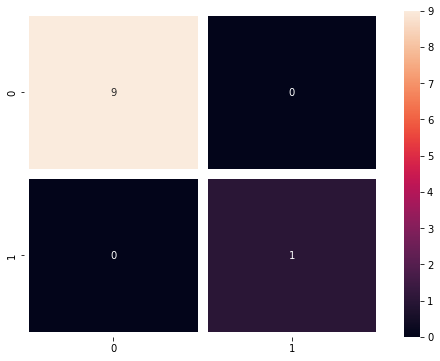

In [292]:


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True, linewidth=10, linecolor='white')

plt.xlabel=("Predicted values")
plt.ylabel=("Actual values")
plt.show()

In [293]:
from sklearn.metrics import classification_report

cr=classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         1

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



#### Now, we are using Radial Basis Fuction (RBF) Kernel in SVM

In [294]:
from sklearn.svm import SVC

In [295]:
svm_rf= SVC(kernel="rbf")
svm_rf

SVC()

In [296]:
svm_rf.fit(x_train, y_train)

SVC()

In [297]:
pred= svm_rf.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [298]:
score=svm_rf.score(x_test, y_test)
score

0.9

In [299]:
from sklearn.metrics import confusion_matrix

In [300]:
confusion_matrix= confusion_matrix(y_test, pred)
confusion_matrix

array([[9, 0],
       [1, 0]], dtype=int64)

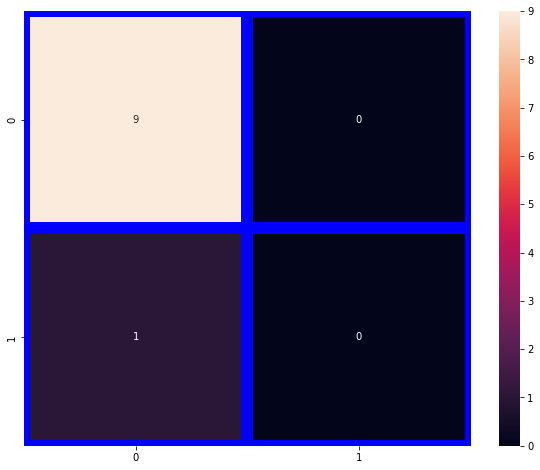

In [301]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix, annot=True, linewidth=12, linecolor='blue')

plt.xlabel=("Predicted_value")
plt.ylabel=("Actual_value")
plt.show()



In [302]:
from sklearn.metrics import classification_report

In [303]:
classification_report= classification_report(y_test, pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



### NOW WE ARE USING POLY KERNEL

In [304]:
from sklearn.svm import SVC

In [305]:
sv_poly= SVC(kernel='poly')
sv_poly

SVC(kernel='poly')

In [306]:
sv_poly.fit(x_train, y_train)

SVC(kernel='poly')

In [307]:
pred= sv_poly.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [308]:
sv_poly.score(x_test, y_test)

0.9

In [309]:
from sklearn.metrics import confusion_matrix

In [310]:
cm=confusion_matrix(pred, y_test)
cm

array([[9, 1],
       [0, 0]], dtype=int64)

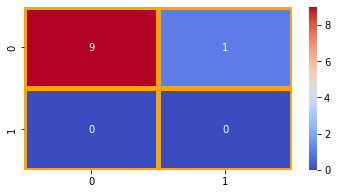

In [311]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,3))
sns.heatmap(cm,annot=True, cmap='coolwarm', linewidth=5, linecolor='orange')
plt.xlabel="predicted"
plt.ylabel="Actual value"

In [312]:
from sklearn.metrics import classification_report

In [313]:
cr= classification_report(y_test, pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



### NOW WE ARE APPLYING DECISION TREE

In [314]:
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

mo=DecisionTreeClassifier
mo

sklearn.tree._classes.DecisionTreeClassifier

In [315]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=15,min_samples_leaf=8,random_state=50)
model

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=8,
                       random_state=50)

In [316]:
fits=model.fit(x_train,y_train)
fits

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=8,
                       random_state=50)

In [317]:
pred=model.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [318]:
ac=model.score(x_test,y_test)
ac

0.9

In [319]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(pred,y_test)
cm

array([[9, 1],
       [0, 0]], dtype=int64)

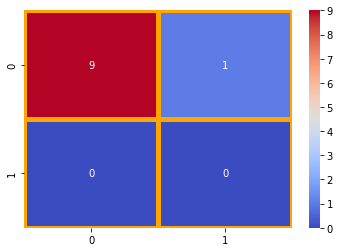

In [320]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True, cmap='coolwarm', linewidth=5, linecolor='orange')
plt.xlabel="predicted"
plt.ylabel="Actual value"

In [321]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



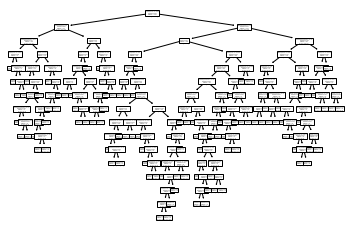

In [322]:
import matplotlib.pyplot as plt

tree.plot_tree(fits,feature_names=["BusinessTravel","DistanceFromHome","EducationField","WorkLifeBalance","EnvironmentSatisfaction","Gender","MaritalStatus","JobSatisfaction"])

plt.show()

#### now we are using gini Argument

In [323]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier
dt

sklearn.tree._classes.DecisionTreeClassifier

In [324]:
gn=DecisionTreeClassifier(criterion="gini", max_depth=15, min_samples_leaf=8, random_state=40 )
gn

DecisionTreeClassifier(max_depth=15, min_samples_leaf=8, random_state=40)

In [325]:
FIT= gn.fit(x_train, y_train)
FIT

DecisionTreeClassifier(max_depth=15, min_samples_leaf=8, random_state=40)

In [326]:
Prediction=gn.predict(x_test)
Prediction

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [327]:
accuracy=gn.score(x_test,y_test)
accuracy

0.8

In [328]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(pred,y_test)
cm

array([[9, 1],
       [0, 0]], dtype=int64)

In [329]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



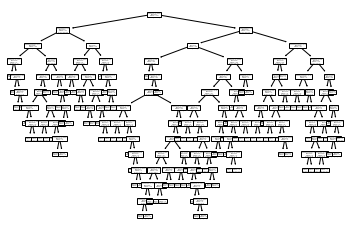

In [330]:
%matplotlib inline

import matplotlib.pyplot as plt

tree.plot_tree(FIT, feature_names=["BusinessTravel","DistanceFromHome","EducationField","WorkLifeBalance","EnvironmentSatisfaction","Gender","MaritalStatus","JobSatisfaction"])
plt.show()



### Now we are applying Random Forest Classifier

In [331]:
from sklearn.ensemble import RandomForestClassifier

In [332]:
clf= RandomForestClassifier(n_estimators=100,criterion='gini')
clf

RandomForestClassifier()

In [333]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [334]:
a=clf.predict(x_test).reshape(-1,1)
a


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [335]:
clf.score(x_test,y_test)

0.9

In [336]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,a)
cm

array([[9, 0],
       [1, 0]], dtype=int64)

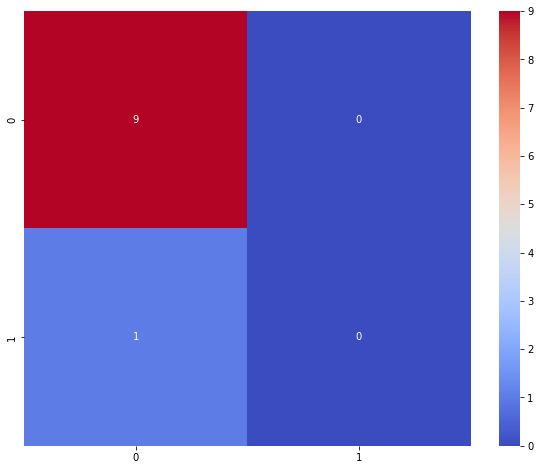

In [337]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True, cmap='coolwarm', linecolor='blue')
plt.xlabel=("Prediction")
plt.ylabel=("Truth")
plt.show()



### NOW WE ARE APPLYING KNeighbors CLASSIFIER

In [338]:
from sklearn.neighbors import KNeighborsClassifier

In [339]:
knn=KNeighborsClassifier(n_neighbors=8)
knn

KNeighborsClassifier(n_neighbors=8)

In [340]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [341]:
p=knn.predict(x_test)
p

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [342]:
knn.score(x_test, y_test)

0.9

In [343]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,p)
cm

array([[9, 0],
       [1, 0]], dtype=int64)

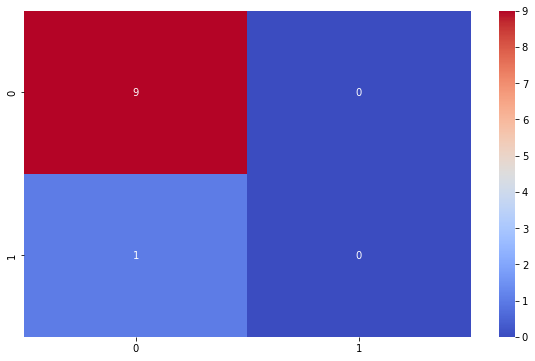

In [344]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True,cmap='coolwarm', linecolor='black')
plt.xlabel=("Prediction")
plt.ylabel=("Truth")

In [345]:
from sklearn.metrics import classification_report

b= classification_report(y_test,pred)
print(b)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



In [353]:
from sklearn.metrics import classification_report

print(classification_report(y_test,a))

              precision    recall  f1-score   support

           0       1.00      0.44      0.62         9
           1       0.17      1.00      0.29         1

    accuracy                           0.50        10
   macro avg       0.58      0.72      0.45        10
weighted avg       0.92      0.50      0.58        10



#### NOW WE ARE APPLYING NAIVE BAYES

In [354]:
x= df[["Age","BusinessTravel","PercentSalaryHike","MaritalStatus","JobSatisfaction","DistanceFromHome","Gender","MonthlyIncome"]]
x       

,Age,BusinessTravel,PercentSalaryHike,MaritalStatus,JobSatisfaction,DistanceFromHome,Gender,MonthlyIncome
0,41,2,11,2,4,1,0,5993
1,49,1,23,1,2,8,1,5130
2,37,2,15,2,3,2,1,2090
3,33,1,11,1,3,3,0,2909
4,27,2,12,1,2,2,1,3468
...,...,...,...,...,...,...,...,...
1465,36,1,17,1,4,23,1,2571
1466,39,2,15,1,1,6,1,9991
1467,27,2,20,1,2,4,1,6142
1468,49,1,14,1,2,2,1,5390


In [355]:
y=df[["Attrition"]]
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [356]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
le

LabelEncoder()

In [357]:
df["BusinessTravel"]=le_BT.fit_transform(df["BusinessTravel"])
df["Department"]=le_DT.fit_transform(df["Department"])
df["EducationField"]=le_EF.fit_transform(df["EducationField"])
df["Gender"]=le_GN.fit_transform(df["Gender"])
df["JobRole"]=le_JR.fit_transform(df["JobRole"])
df["OverTime"]=le_OT.fit_transform(df["OverTime"])
df["MaritalStatus"]=le_MS.fit_transform(df["MaritalStatus"])
df["Attrition"]=le_AR.fit_transform(df['Attrition'])
df



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [358]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [359]:
from sklearn.model_selection import train_test_split

In [360]:
x_train,x_test, y_train, y_test= train_test_split(x,y,test_size=10, random_state=42)

In [361]:
x_train

,Age,BusinessTravel,PercentSalaryHike,MaritalStatus,JobSatisfaction,DistanceFromHome,Gender,MonthlyIncome
665,47,2,18,2,4,2,0,3294
926,43,2,14,2,4,4,0,10231
617,44,2,12,2,2,4,1,5933
361,40,2,13,1,3,10,0,2213
1423,22,2,12,2,3,1,1,3375
...,...,...,...,...,...,...,...,...
1130,35,2,17,1,3,28,1,3407
1294,41,2,12,2,2,5,1,6870
860,22,1,11,1,4,3,1,2853
1459,29,2,13,1,2,13,1,4025


In [362]:
y_train

,Attrition
665,0
926,0
617,0
361,0
1423,0
...,...
1130,0
1294,0
860,1
1459,0


### WE ARE APPLYING MULTINOMIAL NAIVE BAYES

In [363]:
from sklearn.naive_bayes import MultinomialNB

In [364]:
MNB=MultinomialNB()
MNB

MultinomialNB()

In [365]:
MNB.fit(x_train,y_train)

MultinomialNB()

In [366]:
pred=MNB.predict(x_test)
pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1])

In [367]:
accuracy=MNB.score(x_test, y_test)
accuracy

0.5

In [368]:
y_test.head(),pred[0:5]

(      Attrition
 1041          0
 184           0
 1222          1
 67            0
 220           0,
 array([0, 1, 1, 0, 0]))

In [369]:
from sklearn.naive_bayes import GaussianNB

In [370]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred, y_test)
cm

array([[4, 0],
       [5, 1]], dtype=int64)

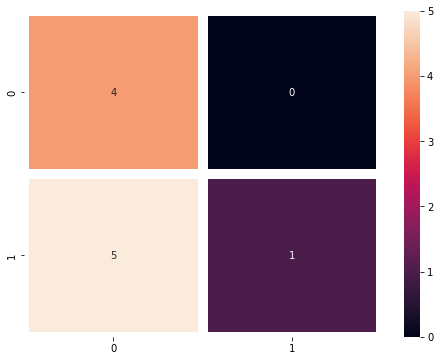

In [371]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True, linewidth=10, linecolor='white')

plt.xlabel="Predicted values"
plt.ylabel="Actual values"
plt.show()

In [372]:
from sklearn.metrics import classification_report

cr=classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.44      0.62         9
           1       0.17      1.00      0.29         1

    accuracy                           0.50        10
   macro avg       0.58      0.72      0.45        10
weighted avg       0.92      0.50      0.58        10



### WE ARE APPLYING Gaussian NAIVE BAYES

In [373]:
from sklearn.naive_bayes import GaussianNB
GB=GaussianNB()
GB

GaussianNB()

In [374]:
GB.fit(x_train,y_train)

GaussianNB()

In [375]:
pred=GB.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [376]:
GB.score(x_test,y_test)

0.9

In [377]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,pred)
cm

array([[9, 0],
       [1, 0]], dtype=int64)

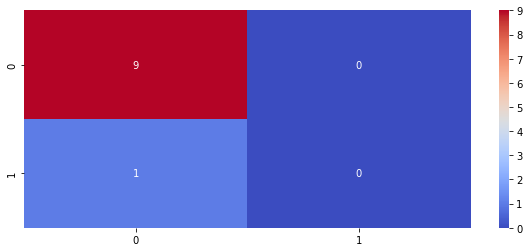

In [378]:
plt.figure(figsize=(10,4))
sns.heatmap(cm,annot=True, cmap='coolwarm',linecolor='grey')
plt.xlabel=("Prediction")
plt.ylabel=("Truth")

In [379]:
from sklearn.metrics  import classification_report

classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.90      1.00      0.95         9\n           1       0.00      0.00      0.00         1\n\n    accuracy                           0.90        10\n   macro avg       0.45      0.50      0.47        10\nweighted avg       0.81      0.90      0.85        10\n'

### WE ARE APPLYING BERNOULLI NAIVE BAYES

In [380]:
from sklearn.naive_bayes import BernoulliNB

B=BernoulliNB()
B

BernoulliNB()

In [381]:
B.fit(x_train,y_train)

BernoulliNB()

In [382]:
p=B.predict(x_test)
p

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [383]:
B.score(x_test,y_test)

0.9

In [384]:
com=confusion_matrix(y_test,p)
com

array([[9, 0],
       [1, 0]], dtype=int64)

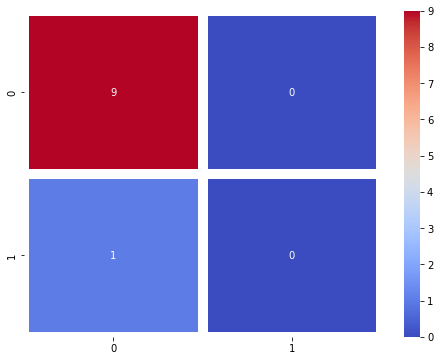

In [385]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True, cmap='coolwarm', linewidth=10, linecolor='white')

plt.xlabel="Predicted values"
plt.ylabel="Actual values"
plt.show()

In [386]:
from sklearn.metrics import classification_report

cr=classification_report(y_test,pred)
print(cr)


              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



### NOW WE ARE APPLYING LOGISTIC REGRESSION

In [387]:
import pandas as pd
df=pd.read_csv("C:/Users/ANMOL ASHA/Downloads/Employee_Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [389]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [390]:
from sklearn.preprocessing import LabelEncoder

In [391]:
LA= LabelEncoder()
LA

LabelEncoder()

In [392]:
df["Attrition"]=LA.fit_transform(df["Attrition"])
df["BusinessTravel"]=LA.fit_transform(df["BusinessTravel"])
df["Department"]=LA.fit_transform(df["Department"])
df["EducationField"]=LA.fit_transform(df["EducationField"])
df["JobRole"]=LA.fit_transform(df["JobRole"])
df["MaritalStatus"]=LA.fit_transform(df["MaritalStatus"])
df["OverTime"]=LA.fit_transform(df["OverTime"])
df



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [393]:
x=df[["Age","BusinessTravel","RelationshipSatisfaction","MaritalStatus","OverTime","TotalWorkingYears","WorkLifeBalance","DailyRate"]]
x

,Age,BusinessTravel,RelationshipSatisfaction,MaritalStatus,OverTime,TotalWorkingYears,WorkLifeBalance,DailyRate
0,41,2,1,2,1,8,1,1102
1,49,1,4,1,0,10,3,279
2,37,2,2,2,1,7,3,1373
3,33,1,3,1,1,8,3,1392
4,27,2,4,1,0,6,3,591
...,...,...,...,...,...,...,...,...
1465,36,1,3,1,0,17,3,884
1466,39,2,1,1,0,9,3,613
1467,27,2,2,1,1,6,3,155
1468,49,1,4,1,0,17,2,1023


In [394]:
y=df[["Attrition"]]
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


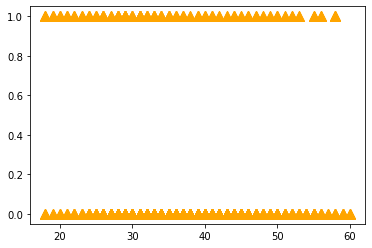

In [395]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df.Age, df.Attrition, color='orange', marker="^", s=100)

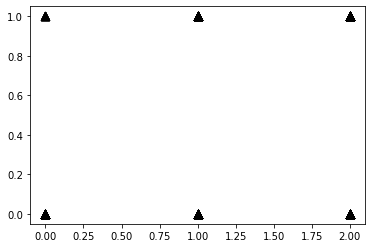

In [396]:
plt.scatter(df.BusinessTravel, df.Attrition, marker="^", s=68, color="black")

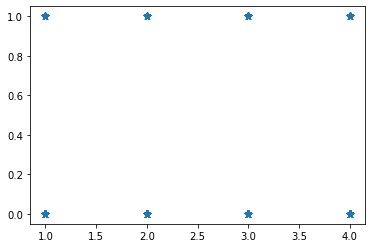

In [397]:
plt.scatter(df.RelationshipSatisfaction, df.Attrition, marker="*", s=50)

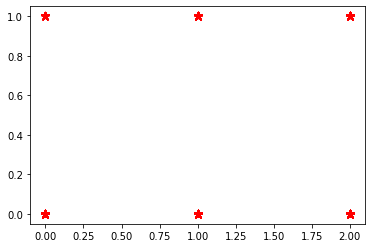

In [398]:
plt.scatter(df.MaritalStatus, df.Attrition, s=67, c='red', marker="*")

In [399]:
from sklearn.model_selection import train_test_split

In [400]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.40, random_state=40)

In [401]:
x_train

,Age,BusinessTravel,RelationshipSatisfaction,MaritalStatus,OverTime,TotalWorkingYears,WorkLifeBalance,DailyRate
632,42,1,4,2,1,8,3,1271
985,31,2,4,1,1,10,2,330
827,28,1,4,0,1,3,3,773
1002,35,1,3,2,0,10,3,200
1420,41,2,1,1,0,12,3,642
...,...,...,...,...,...,...,...,...
1016,31,2,3,2,0,1,4,202
165,50,2,2,2,0,21,3,1452
7,30,2,2,0,0,1,3,1358
219,54,2,4,1,0,16,3,1147


In [402]:
y_train

,Attrition
632,0
985,1
827,0
1002,0
1420,0
...,...
1016,1
165,0
7,0
219,0


In [403]:
x_test

,Age,BusinessTravel,RelationshipSatisfaction,MaritalStatus,OverTime,TotalWorkingYears,WorkLifeBalance,DailyRate
1456,35,1,4,1,1,10,4,1199
236,33,2,1,1,0,13,4,465
70,59,1,4,2,0,20,2,1225
42,26,2,3,2,0,1,2,1357
454,29,2,2,0,0,8,4,232
...,...,...,...,...,...,...,...,...
1334,27,1,4,1,0,8,2,1131
868,28,2,3,1,0,6,3,1179
622,32,2,3,0,0,8,2,117
772,56,1,2,1,0,18,3,1240


In [404]:
y_test

,Attrition
1456,0
236,1
70,0
42,1
454,0
...,...
1334,0
868,0
622,0
772,0


In [405]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model

LogisticRegression()

In [406]:
model.fit(x_train, y_train)

LogisticRegression()

In [407]:
prediction= model.predict(x_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [408]:
accuracy=model.score(x_test, y_test)
accuracy

0.8452380952380952

In [409]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test, prediction)
cm



array([[486,   6],
       [ 85,  11]], dtype=int64)

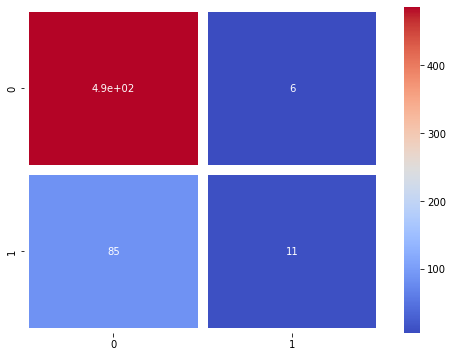

In [410]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True, cmap='coolwarm', linewidth=10, linecolor='white')

plt.xlabel=("Predicted values")
plt.ylabel=("Actual values")
plt.show()

In [411]:
from sklearn.metrics import classification_report

In [412]:
cr= classification_report(y_test, prediction)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       492
           1       0.65      0.11      0.19        96

    accuracy                           0.85       588
   macro avg       0.75      0.55      0.55       588
weighted avg       0.82      0.85      0.80       588



#### NOW WE ARE APPLYING LINEAR REGRESSION ON STOCK DATASET

In [413]:
import pandas as pd
import seaborn as sns

df=pd.read_csv("C:/Users/ANMOL ASHA/Downloads/Stock.csv")
df

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,1.12.17,79.75,81.00,78.20,78.85,79.468121,84508,413,6715692,27668.0,32.74,2.80,-0.90
1,2.12.17,80.00,80.00,78.10,78.25,78.417136,26121,203,2048334,17436.0,66.75,1.90,-1.75
2,3.12.17,78.00,78.35,77.00,77.50,77.819159,37016,308,2880554,17710.0,47.84,1.35,-0.50
3,4.12.17,77.75,78.30,77.00,77.35,77.717529,37926,257,2947515,21573.0,56.88,1.30,-0.40
4,5.12.17,77.85,80.60,77.00,78.55,79.504552,141599,1023,11257765,36238.0,25.59,3.60,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,3.5.21,37.35,38.00,34.80,36.20,36.131030,5942129,12648,214695244,2266352.0,38.14,3.20,-1.15
1250,4.5.21,36.05,37.20,34.10,34.95,35.255090,5621854,12013,198198968,1535627.0,27.32,3.10,-1.10
1251,5.5.21,35.10,38.15,33.10,33.90,36.166200,8883397,18328,321278716,1953520.0,21.99,5.05,-1.20
1252,6.5.21,35.00,35.85,32.15,32.65,33.242979,6211952,12842,206503790,2127960.0,34.26,3.70,-2.35


In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       1254 non-null   object 
 1   Open Price                 1254 non-null   float64
 2   High Price                 1254 non-null   float64
 3   Low Price                  1254 non-null   float64
 4   Close Price                1254 non-null   float64
 5   WAP                        1254 non-null   float64
 6   No.of Shares               1254 non-null   int64  
 7   No. of Trades              1254 non-null   int64  
 8   Total Turnover (Rs.)       1254 non-null   int64  
 9   Deliverable Quantity       1247 non-null   float64
 10  % Deli. Qty to Traded Qty  1247 non-null   float64
 11  Spread High-Low            1254 non-null   float64
 12  Spread Close-Open          1254 non-null   float64
dtypes: float64(9), int64(3), object(1)
memory usage:

In [415]:
df.describe()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1.254000e+03,1254.000000,1.254000e+03,1.247000e+03,1247.000000,1254.000000,1254.000000
mean,29.042871,29.576531,28.420335,28.890255,28.983602,8.211201e+05,1706.479266,2.165634e+07,3.392007e+05,46.199158,1.156196,-0.152616
std,19.351266,19.658580,19.036442,19.294214,19.353981,2.091222e+06,3222.730084,7.520261e+07,8.454506e+05,15.130654,1.190874,1.019602
min,10.350000,10.850000,10.040000,10.210000,10.377715,3.341000e+03,39.000000,1.361240e+05,1.316000e+03,2.300000,0.140000,-15.650000
25%,17.800000,18.050000,17.450000,17.700000,17.785262,5.355425e+04,279.250000,1.446659e+06,2.500500e+04,35.055000,0.500000,-0.457500
50%,20.550000,21.000000,20.150000,20.500000,20.541441,1.871305e+05,687.000000,4.947749e+06,8.180400e+04,45.360000,0.800000,-0.150000
75%,31.000000,31.450000,30.337500,30.787500,30.893676,7.406592e+05,1753.250000,1.462891e+07,2.878440e+05,56.020000,1.350000,0.150000
max,87.000000,88.050000,82.400000,87.100000,85.199112,2.510526e+07,33057.000000,1.311627e+09,1.061585e+07,98.510000,15.650000,11.700000


In [416]:
df.isnull().sum()

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         7
% Deli. Qty to Traded Qty    7
Spread High-Low              0
Spread Close-Open            0
dtype: int64

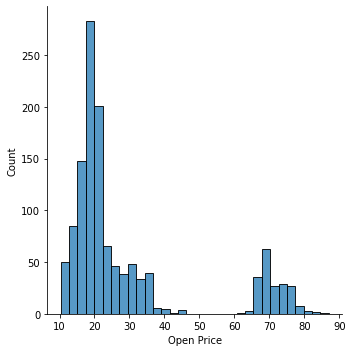

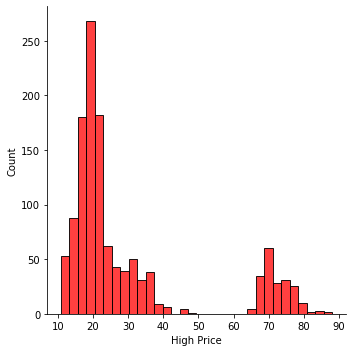

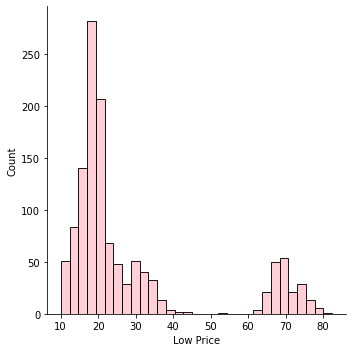

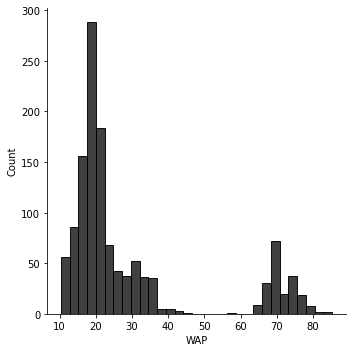

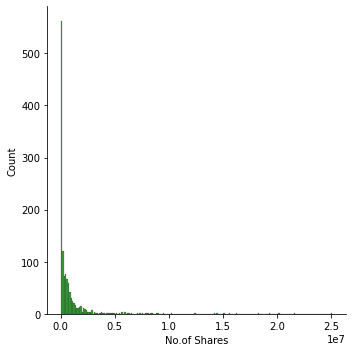

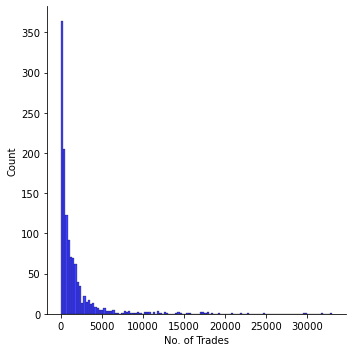

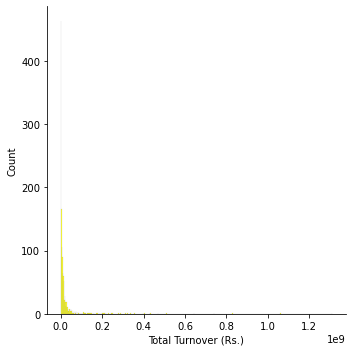

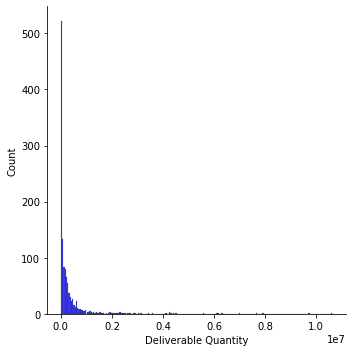

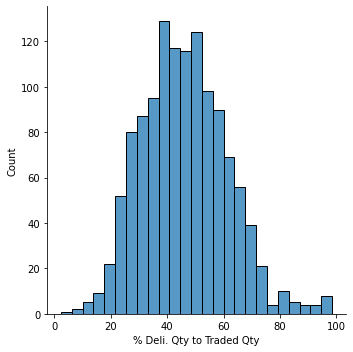

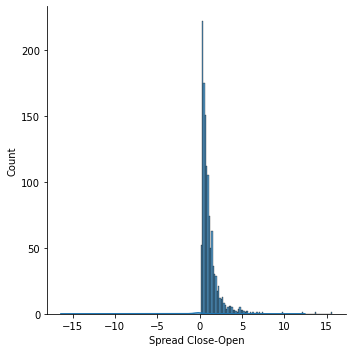

In [417]:
sns.displot(df["Open Price"])
sns.displot(df["High Price"], color='red')
sns.displot(df["Low Price"], color='pink')
sns.displot(df["WAP"], color='black')
sns.displot(df["No.of Shares"], color='green')
sns.displot(df["No. of Trades"], color='blue')
sns.displot(df["Total Turnover (Rs.)"], color='yellow')
sns.displot(df["Deliverable Quantity"], color="blue")
sns.displot(df["% Deli. Qty to Traded Qty"])
sns.displot(df["Spread High-Low"])
sns.distplot(df["Spread Close-Open"])
plt.show()

<AxesSubplot:xlabel='High Price', ylabel='Open Price'>

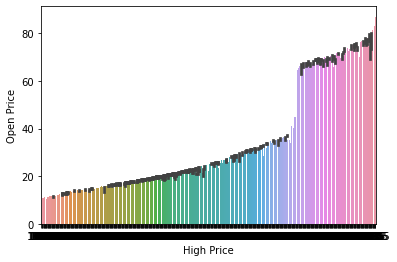

In [420]:
sns.barplot(x="High Price",y="Open Price", data=df )

<AxesSubplot:xlabel='Open Price', ylabel='count'>

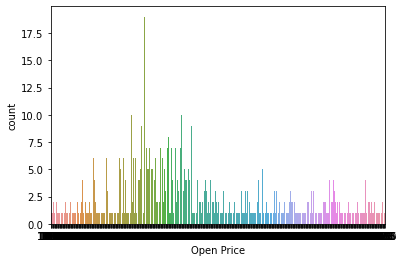

In [423]:
sns.countplot(x="Open Price", data=df )

<AxesSubplot:>

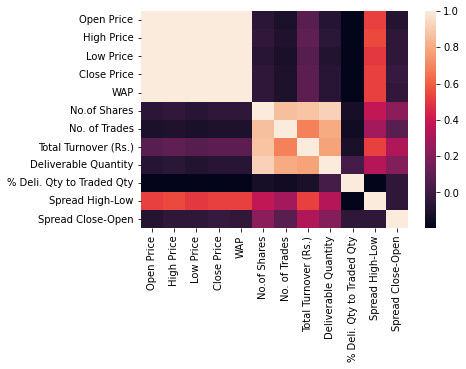

In [446]:
sns.heatmap(df.corr())

In [424]:
x=df[["High Price","Low Price","Close Price","No.of Shares","No. of Trades"]]
x

,High Price,Low Price,Close Price,No.of Shares,No. of Trades
0,81.00,78.20,78.85,84508,413
1,80.00,78.10,78.25,26121,203
2,78.35,77.00,77.50,37016,308
3,78.30,77.00,77.35,37926,257
4,80.60,77.00,78.55,141599,1023
...,...,...,...,...,...
1249,38.00,34.80,36.20,5942129,12648
1250,37.20,34.10,34.95,5621854,12013
1251,38.15,33.10,33.90,8883397,18328
1252,35.85,32.15,32.65,6211952,12842


In [425]:
y=df[["Open Price"]]
y

,Open Price
0,79.75
1,80.00
2,78.00
3,77.75
4,77.85
...,...
1249,37.35
1250,36.05
1251,35.10
1252,35.00


In [426]:
from sklearn.model_selection import train_test_split

In [427]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

In [428]:
x_train.head()

,High Price,Low Price,Close Price,No.of Shares,No. of Trades
30,75.60,74.00,74.75,42365,259
712,11.46,10.74,10.83,1838817,4180
562,13.10,10.20,12.05,400884,1660
221,29.75,29.10,29.35,42788,273
636,17.95,17.35,17.65,163157,431


In [429]:
y_train.head()

,Open Price
30,74.00
712,11.31
562,13.00
221,29.75
636,17.95


In [430]:
y_test.head()

,Open Price
933,20.7
387,20.4
120,70.2
629,17.7
1168,19.0


In [431]:
x_test.head()

,High Price,Low Price,Close Price,No.of Shares,No. of Trades
933,20.80,20.50,20.65,3911067,1513
387,21.70,20.40,20.60,258663,1058
120,72.25,69.90,71.70,65283,493
629,18.28,17.35,17.44,211972,637
1168,19.00,18.10,18.35,1293352,2080


In [432]:
from sklearn.linear_model import LinearRegression


In [433]:
lr=LinearRegression()
lr

LinearRegression()

In [434]:
lr.fit(x_train, y_train)

LinearRegression()

In [435]:
prediction= lr.predict(x_test)
prediction[0:10]

array([[20.38065761],
       [21.34662227],
       [70.61175461],
       [18.06630508],
       [18.63946897],
       [18.31305441],
       [19.48123492],
       [74.52709226],
       [18.3263725 ],
       [18.0698258 ]])

In [436]:
accuracy= lr.score(x_test, y_test)
accuracy

0.9993576574729572

In [437]:
lr.coef_

array([[ 8.03657184e-01,  7.97521906e-01, -6.03508231e-01,
        -8.30732415e-08,  2.45429837e-05]])

In [438]:
lr.intercept_

array([0.06560555])

In [439]:
from sklearn.metrics import mean_squared_error

In [440]:
MSE= mean_squared_error(y_test, prediction)
print("The Mean square Error of our model is{}". format(round(MSE,2)*100))

The Mean square Error of our model is27.0


In [441]:
from sklearn.metrics import r2_score

RMSE=r2_score(prediction,y_test)
score

print("The Root Mean square of our model is {}%". format (round(RMSE, 2)*100))

The Root Mean square of our model is 100.0%


In [442]:
from sklearn.metrics import mean_absolute_error

In [443]:
MAE= mean_absolute_error(y_test, prediction)
MAE

0.3131544210595864

In [444]:
print("The Mean absolute error of our model is{}%". format(round(MAE,2)*100))

The Mean absolute error of our model is31.0%
